In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datasets import load_dataset

### Miracl

In [86]:
ds = load_dataset("Cohere/miracl-ru-queries-22-12")

train = ds["train"]
dev = ds["dev"]

train_queries = train["query"]
train_positive_passages = train["positive_passages"]
train_negative_passages = train["negative_passages"]

In [87]:
train_df = pd.DataFrame(columns=['question', 'answer', 'isRelevant'])

In [88]:
for i in range(len(train_queries)):
    positive_answers = [x["text"] for x in train_positive_passages[i]]
    negative_answers = [x["text"] for x in train_negative_passages[i]]

    positive_data = pd.DataFrame({
        'question': [train_queries[i]] * len(positive_answers),
        'answer': positive_answers,
        'isRelevant': [1] * len(positive_answers)
    })

    negative_data = pd.DataFrame({
        'question': [train_queries[i]] * len(negative_answers),
        'answer': negative_answers,
        'isRelevant': [0] * len(negative_answers)
    })

    train_df = pd.concat([train_df, positive_data, negative_data], ignore_index=True)

In [89]:
val_positive_passages = dev["positive_passages"]
val_negative_passages = dev["negative_passages"]
val_queries = dev["query"]
m = len(val_queries)
val_df = pd.DataFrame(columns=['question', 'answer', 'isRelevant'])
for i in range(m):
    positive_answers = [x["text"] for x in val_positive_passages[i]]
    negative_answers = [x["text"] for x in val_negative_passages[i]]

    positive_data = pd.DataFrame({
        'question': [val_queries[i]] * len(positive_answers),
        'answer': positive_answers,
        'isRelevant': [1] * len(positive_answers)
    })

    negative_data = pd.DataFrame({
        'question': [val_queries[i]] * len(negative_answers),
        'answer': negative_answers,
        'isRelevant': [0] * len(negative_answers)
    })
    val_df = pd.concat([val_df, positive_data, negative_data], ignore_index=True)

In [90]:
train_df["isRelevant"].value_counts()

isRelevant
0    23921
1    10000
Name: count, dtype: int64

In [91]:
train_df.shape, val_df.shape

((33921, 3), (13100, 3))

### YandexQ

In [92]:
path_to_jsonl = "dataset.jsonl"

In [93]:
import json

data = []
c = 0
with open(path_to_jsonl, 'r', encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))

data = [d for d in data if len(d["answer"]) > 300]
for d in data:
    d["question"] = d["question"].replace("\n", "")
    d["answer"] = d["answer"].replace("\n", "")

In [94]:
yandexq_df = pd.DataFrame()
yandexq_df["question"] = [d["question"] for d in data]
yandexq_df["answer"] = [d["answer"] for d in data]
yandexq_df["isRelevant"] = [1 for d in data]

In [95]:
print(yandexq_df.shape)
yandexq_df.head()

(414233, 3)


,question,answer,isRelevant
0,Почему у ноутбука очень часто включается венти...,Если у вас открыто 20 вкладок это особо не наг...,1
1,"Как снять заднее сиденье на ""Киа Рио Х Лайн""?",Необходимость в этой операции обычно возникает...,1
2,Может ли бес заставлять молиться?,"И может, и активно так поступает. Это одна из ...",1
3,Где найти работу для фрилансера в 13 лет?,Вы не поверите — на фриланс-биржах. В своё вре...,1
4,"Почему правильнее говорить ""гомосексуалы"", а н...",Суффикс -ист- несёт в себе значение человека с...,1


In [96]:
train_df['question_length'] = train_df['question'].apply(len)
train_df['answer_length'] = train_df['answer'].apply(len)
yandexq_df['question_length'] = yandexq_df['question'].apply(len)
yandexq_df['answer_length'] = yandexq_df['answer'].apply(len)

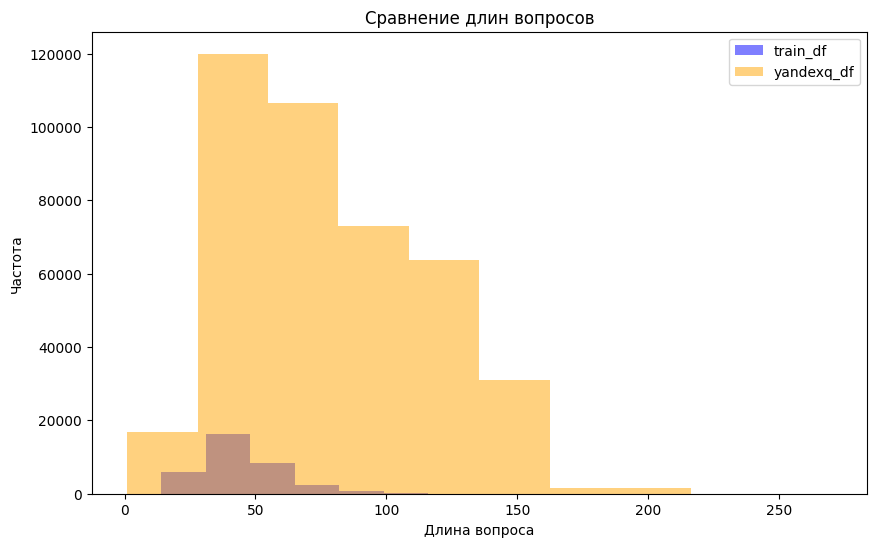

In [97]:
plt.figure(figsize=(10, 6))

plt.hist(train_df['question_length'], bins=10, alpha=0.5, label='train_df', color='blue')

plt.hist(yandexq_df['question_length'], bins=10, alpha=0.5, label='yandexq_df', color='orange')

plt.title('Сравнение длин вопросов')
plt.xlabel('Длина вопроса')
plt.ylabel('Частота')
plt.legend()

plt.show()

In [98]:
yandexq_df = yandexq_df[yandexq_df["answer_length"] < 10000]

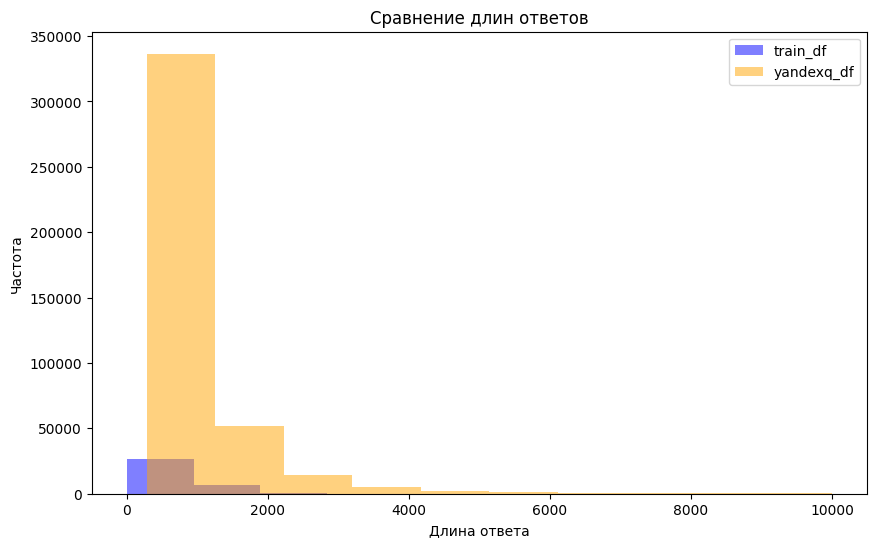

In [99]:
plt.figure(figsize=(10, 6))

plt.hist(train_df['answer_length'], bins=10, alpha=0.5, label='train_df', color='blue')

plt.hist(yandexq_df['answer_length'], bins=10, alpha=0.5, label='yandexq_df', color='orange')

plt.title('Сравнение длин ответов')
plt.xlabel('Длина ответа')
plt.ylabel('Частота')
plt.legend()

plt.show()

In [100]:
train_df.describe()

,question_length,answer_length
count,33921.000000,33921.000000
mean,44.564459,726.279178
std,16.372443,450.678756
min,14.000000,7.000000
25%,33.000000,423.000000
50%,42.000000,642.000000
75%,52.000000,916.000000
max,184.000000,9461.000000


In [101]:
yandexq_df.describe()

,isRelevant,question_length,answer_length
count,413674.0,413674.000000,413674.000000
mean,1.0,77.999398,912.539497
std,0.0,36.836600,849.627447
min,1.0,1.000000,285.000000
25%,1.0,48.000000,428.000000
50%,1.0,71.000000,632.000000
75%,1.0,106.000000,1049.000000
max,1.0,270.000000,9996.000000


In [102]:
yandexq_df_prefiltered = yandexq_df[(yandexq_df["question_length"]<=80) & (yandexq_df["answer_length"] <= 2000)]
yandexq_df_prefiltered.shape

(219325, 5)

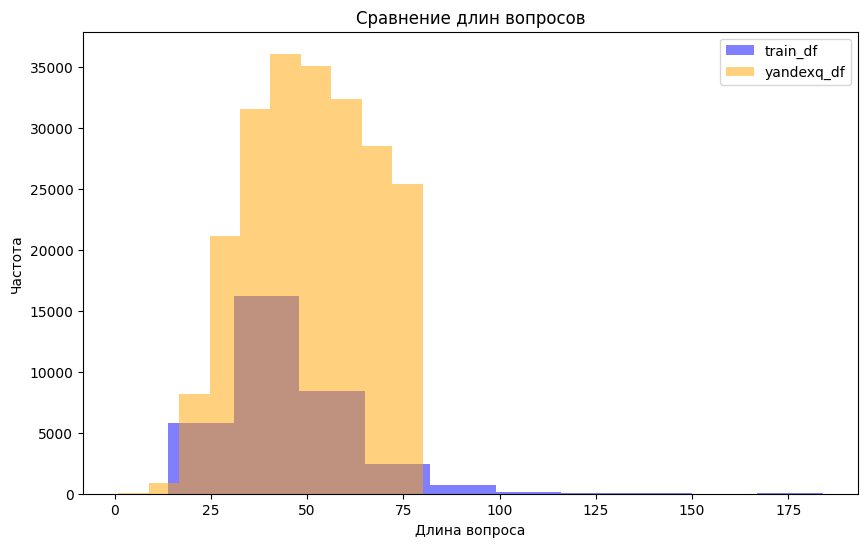

In [103]:
plt.figure(figsize=(10, 6))

plt.hist(train_df['question_length'], bins=10, alpha=0.5, label='train_df', color='blue')

plt.hist(yandexq_df_prefiltered['question_length'], bins=10, alpha=0.5, label='yandexq_df', color='orange')

plt.title('Сравнение длин вопросов')
plt.xlabel('Длина вопроса')
plt.ylabel('Частота')
plt.legend()

plt.show()

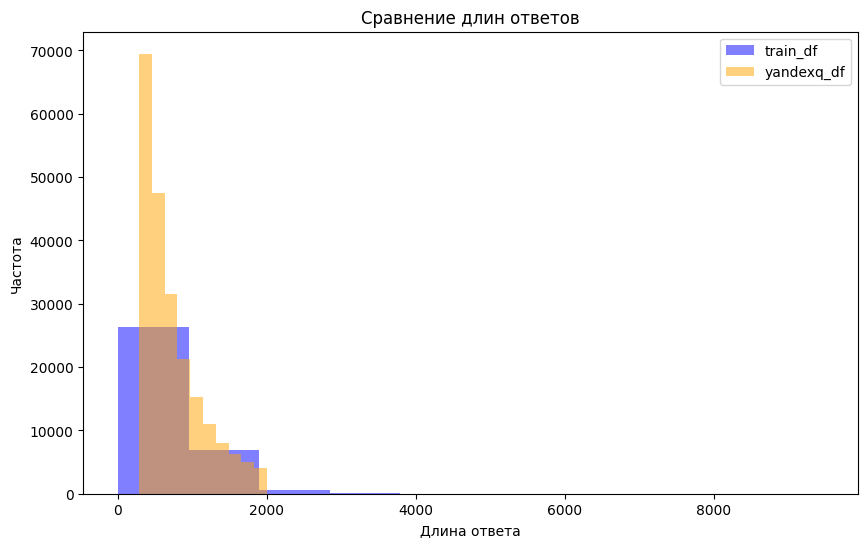

In [104]:
plt.figure(figsize=(10, 6))

plt.hist(train_df['answer_length'], bins=10, alpha=0.5, label='train_df', color='blue')

plt.hist(yandexq_df_prefiltered['answer_length'], bins=10, alpha=0.5, label='yandexq_df', color='orange')

plt.title('Сравнение длин ответов')
plt.xlabel('Длина ответа')
plt.ylabel('Частота')
plt.legend()

plt.show()

In [105]:
print(train_df.columns)
print(yandexq_df_prefiltered.columns)

Index(['question', 'answer', 'isRelevant', 'question_length', 'answer_length'], dtype='object')
Index(['question', 'answer', 'isRelevant', 'question_length', 'answer_length'], dtype='object')


In [106]:
yandexq_df_remarked = yandexq_df_prefiltered.drop(columns=["isRelevant", "question_length", "answer_length"])
yandexq_df_remarked["isMiracl"] = np.zeros(yandexq_df_remarked.shape[0], dtype=int)

train_df_remarked = train_df.drop(columns=["isRelevant", "question_length", "answer_length"])
train_df_remarked["isMiracl"] = np.ones(train_df_remarked.shape[0], dtype=int)

In [107]:
yandexq_df_remarked["isMiracl"]

0         0
1         0
2         0
3         0
4         0
         ..
414219    0
414220    0
414227    0
414230    0
414231    0
Name: isMiracl, Length: 219325, dtype: int32

In [112]:
np.random.seed(42)

num_train_samples = train_df.shape[0]
random_indices_train = np.random.choice(yandexq_df_remarked.index, size=num_train_samples, replace=False)
remaining_indices = np.setdiff1d(yandexq_df_remarked.index, random_indices_train)
random_indices_valid = np.random.choice(remaining_indices, size=num_train_samples*2, replace=False)

In [115]:
print(train_df_remarked.columns)
print(yandexq_df_remarked.columns)

Index(['question', 'answer', 'isMiracl'], dtype='object')
Index(['question', 'answer', 'isMiracl'], dtype='object')


In [116]:
yandexq_df_remarked_random_sample = yandexq_df_remarked.loc[random_indices_train]

X_combined_train = pd.concat([train_df_remarked, yandexq_df_remarked_random_sample], ignore_index=True)
y_combined_train = X_combined_train["isMiracl"]

X_combined_train = X_combined_train.drop(columns=["isMiracl"])

print(X_combined_train.shape)
print(y_combined_train.value_counts())

(67842, 2)
isMiracl
1    33921
0    33921
Name: count, dtype: int64


In [120]:
X_combined_valid = yandexq_df_remarked.loc[random_indices_valid]
y_combined_valid = X_combined_valid["isMiracl"]
X_combined_valid = X_combined_valid.drop(columns=["isMiracl"])

X_combined_valid.head()

,question,answer
314254,Как различные духовные практики преодолевают н...,В случае с христианскими практиками упор делал...
227605,МНП частота собственных колебаний свободного с...,ну так вы же сами написали - справа f''n(xi=L)...
204341,Есть ли какие-нибудь действительно эффективные...,"Изолированных - нет; системные наборы, меняющи..."
213229,За что вы бы сказали «спасибо» своим родителям?,"За воспитание, да оно было далеко от идеала. Н..."
381880,Какие города России в пределах 300 км от Москв...,"Начните со старых русских городов, входящих в ..."


In [121]:
X_combined_train.shape, X_combined_valid.shape

((67842, 2), (67842, 2))

In [123]:
X_combined_train['text'] = X_combined_train['question'] + " [SEP] " + X_combined_train['answer']
X_combined_valid['text'] = X_combined_valid['question'] + " [SEP] " + X_combined_valid['answer']
X_combined_train = X_combined_train.drop(["question", "answer"], axis=1)
X_combined_valid = X_combined_valid.drop(["question", "answer"], axis=1)

In [124]:
X_combined_train.head()

,text
0,Когда был спущен на воду первый миноносец «Спо...
1,Когда был спущен на воду первый миноносец «Спо...
2,Когда был спущен на воду первый миноносец «Спо...
3,Когда был спущен на воду первый миноносец «Спо...
4,Когда был спущен на воду первый миноносец «Спо...


In [125]:
X_combined_valid.head()

,text
314254,Как различные духовные практики преодолевают н...
227605,МНП частота собственных колебаний свободного с...
204341,Есть ли какие-нибудь действительно эффективные...
213229,За что вы бы сказали «спасибо» своим родителям...
381880,Какие города России в пределах 300 км от Москв...


In [126]:
y_combined_train

0        1
1        1
2        1
3        1
4        1
        ..
67837    0
67838    0
67839    0
67840    0
67841    0
Name: isMiracl, Length: 67842, dtype: int32

In [131]:
!pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------------ --------------- 1.0/1.7 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 6.7 MB/s eta 0:00:00


In [132]:
import torch
from transformers import Trainer, TrainingArguments
from transformers import BertTokenizer, BertForSequenceClassification

In [137]:
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
    device = torch.device("cpu")
else:
    print('CUDA is available!  Training on GPU ...')
    device = torch.device("cuda")




CUDA is not available.  Training on CPU ...


In [138]:
tokenizer = BertTokenizer.from_pretrained('cointegrated/rubert-tiny')
model = BertForSequenceClassification.from_pretrained('cointegrated/rubert-tiny', num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cointegrated/rubert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [139]:
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(29564, 312, padding_idx=0)
      (position_embeddings): Embedding(512, 312)
      (token_type_embeddings): Embedding(2, 312)
      (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-2): 3 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=312, out_features=312, bias=True)
              (key): Linear(in_features=312, out_features=312, bias=True)
              (value): Linear(in_features=312, out_features=312, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=312, out_features=312, bias=True)
              (LayerNorm): LayerNorm((312,), eps=1e-1

In [141]:
train_encodings = tokenizer(X_combined_train["text"].tolist(), truncation=True, padding=True)
valid_encodings = tokenizer(X_combined_valid["text"].tolist(), truncation=True, padding=True)
train_labels = y_combined_train
valid_labels = y_combined_valid

In [142]:
class RelevantDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [148]:
train_dataset = RelevantDataset(train_encodings, train_labels.tolist())
valid_dataset = RelevantDataset(valid_encodings, valid_labels.tolist())

In [152]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,  # увеличено число эпох
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=2e-5,  # зафиксированная скорость обучения
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    eval_strategy="steps",  # оценка на каждом шаге
    eval_steps=2500,
    lr_scheduler_type='cosine',
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    save_strategy="steps",  # сохранение на каждом шаге
    save_steps=2500,  # save_steps кратно eval_steps
    greater_is_better=False
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
)

In [ ]:
trainer.train()

In [ ]:
torch.save(model.state_dict(), "next_model.pt")

In [155]:
model = BertForSequenceClassification.from_pretrained('cointegrated/rubert-tiny', num_labels=2)
state_dict = torch.load("homogenity_model_1epoch.pt", map_location=torch.device('cpu'))
model.load_state_dict(state_dict)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cointegrated/rubert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_14864\1157728740.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.

<All keys matched successfully>

In [156]:
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(29564, 312, padding_idx=0)
      (position_embeddings): Embedding(512, 312)
      (token_type_embeddings): Embedding(2, 312)
      (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-2): 3 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=312, out_features=312, bias=True)
              (key): Linear(in_features=312, out_features=312, bias=True)
              (value): Linear(in_features=312, out_features=312, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=312, out_features=312, bias=True)
              (LayerNorm): LayerNorm((312,), eps=1e-1

In [212]:
def predict(question, answer, model, threshold=0.5):
    inputs = tokenizer(f"{question}[SEP]{answer}", return_tensors='pt', truncation=True, padding=True)
    outputs = model(**inputs)
    probas = torch.nn.functional.softmax(outputs.logits, dim=-1)[0]
    if probas[1] >= threshold:
        return 1
    else:
        return 0  

In [213]:
from tqdm import tqdm

In [222]:
predictions = []

In [223]:
for text in tqdm(X_combined_valid["text"]):
    qu = text.split("[SEP]")[0]
    an = text.split("[SEP]")[1]
    predictions.append(predict(qu, an, model, threshold=0.01))

100%|████████████████████████████████████████████████████████████████████████████| 67842/67842 [14:39<00:00, 77.15it/s]


In [164]:
model2 = BertForSequenceClassification.from_pretrained('cointegrated/rubert-tiny', num_labels=2)
state_dict2 = torch.load("homogenity_model_2epoch.pt", map_location=torch.device('cpu'))
model2.load_state_dict(state_dict2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cointegrated/rubert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_14864\869236614.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.s

<All keys matched successfully>

In [165]:
predictions_2 = []

In [166]:
for text in tqdm(X_combined_valid["text"]):
    qu = text.split("[SEP]")[0]
    an = text.split("[SEP]")[1]
    predictions_2.append(predict(qu, an, model2))

100%|████████████████████████████████████████████████████████████████████████████| 67842/67842 [14:41<00:00, 76.96it/s]


In [182]:
model3 = BertForSequenceClassification.from_pretrained('cointegrated/rubert-tiny', num_labels=2)
state_dict3 = torch.load("homogenity_model_3epoch.pt", map_location=torch.device('cpu'))
model3.load_state_dict(state_dict3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cointegrated/rubert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Эдуард\AppData\Local\Temp\ipykernel_14864\1348548223.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.

<All keys matched successfully>

In [183]:
predictions_3 = []

In [184]:
for text in tqdm(X_combined_valid["text"]):
    qu = text.split("[SEP]")[0]
    an = text.split("[SEP]")[1]
    predictions_3.append(predict(qu, an, model3))

100%|████████████████████████████████████████████████████████████████████████████| 67842/67842 [14:25<00:00, 78.39it/s]


In [224]:
predictions = pd.Series(predictions)
predictions_2 = pd.Series(predictions_2)
predictions_3 = pd.Series(predictions_3)

In [225]:
predictions.value_counts()

0    65704
1     2138
Name: count, dtype: int64

In [169]:
predictions_2.value_counts()

0    66839
1     1003
Name: count, dtype: int64

In [187]:
predictions_3.value_counts()

0    67117
1      725
Name: count, dtype: int64

In [226]:
random_indices_valid_large = np.random.choice(remaining_indices, size=num_train_samples*5, replace=False)

In [227]:
X_combined_valid_large = yandexq_df_remarked.loc[random_indices_valid_large]
y_combined_valid_large = X_combined_valid_large["isMiracl"]
X_combined_valid_large = X_combined_valid_large.drop(columns=["isMiracl"])

X_combined_valid_large.head()

,question,answer
325781,Как оплатить налог на машину без квитанции?,Чтобы оплатить налог достаточно знать реквизит...
301619,Какие положительные и отрицательные стороны уп...,Из положительного 1.возможность работать с неб...
126342,Кто такая крестная мать?,Крестная мать – это воцерковленная православна...
90792,"Почему за границей (ПМЖ) время течет медленно,...",На самом деле время везде течет одинаково. Пос...
110597,Как поступить в НИУ ВШЭ?,Зависит от факультета. На большинстве схема по...


In [228]:
X_combined_valid_large['text'] = X_combined_valid_large['question'] + " [SEP] " + X_combined_valid_large['answer']
X_combined_valid_large = X_combined_valid_large.drop(["question", "answer"], axis=1)

In [241]:
predictions_1_1 = []

In [242]:
for text in tqdm(X_combined_valid_large["text"]):
    qu = text.split("[SEP]")[0]
    an = text.split("[SEP]")[1]
    predictions_1_1.append(predict(qu, an, model, threshold=0.0005))

100%|██████████████████████████████████████████████████████████████████████████| 169605/169605 [36:30<00:00, 77.42it/s]


In [243]:
predictions_1_1 = pd.Series(predictions_1_1)
predictions_1_1.value_counts()

0    157473
1     12132
Name: count, dtype: int64

In [245]:
ones_indices = random_indices_valid_large[predictions_1_1==1]

In [246]:
yandexq_df_filtered = yandexq_df_prefiltered.loc[ones_indices]

In [248]:
yandexq_df_filtered = yandexq_df_filtered.drop(columns=["question_length", "answer_length"])

In [249]:
yandexq_df_filtered.head()

,question,answer,isRelevant
126342,Кто такая крестная мать?,Крестная мать – это воцерковленная православна...,1
235178,Существует ли противоядие от отравления ядом р...,"Нет, противоядия от тетродотоксина, которого п...",1
214199,Является ли энергетика прикладной физикой?,Энерге́тика — область хозяйственно-экономическ...,1
323040,Кто правил СССР после Сталина?,Сталин 1922–1953Маленков 1953–1955**Маленков Г...,1
298648,Как Армения побудила Турцию активизировать кон...,"Никак, потому что если кто и побудил активизир...",1


In [250]:
yandexq_df_filtered.shape

(12132, 3)

In [251]:
yandexq_df_filtered.to_csv("filtered_yandexq.csv", index=False)